In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_style('whitegrid')

In [94]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Indian Liver Patient Dataset (ILPD).csv")

In [95]:
df.head()

age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1

In [96]:
df.shape

(583, 11)

In [97]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [99]:
df.duplicated().sum()

13

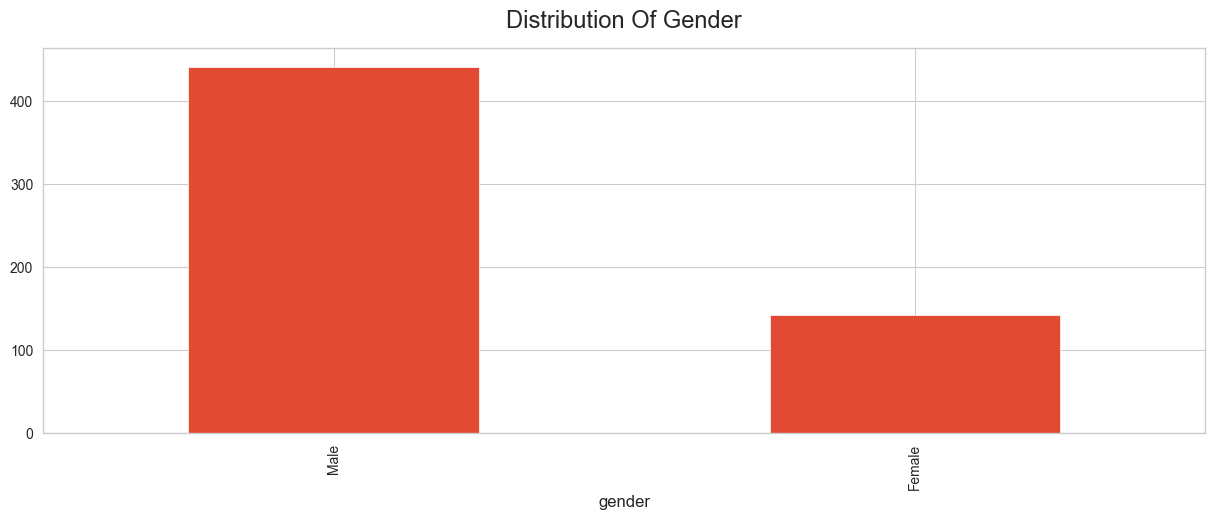

In [100]:
df['gender'].value_counts().plot(kind = 'bar', figsize = (15,5))
plt.title( 'Distribution Of Gender', size = 17, pad = 15)
plt.show()

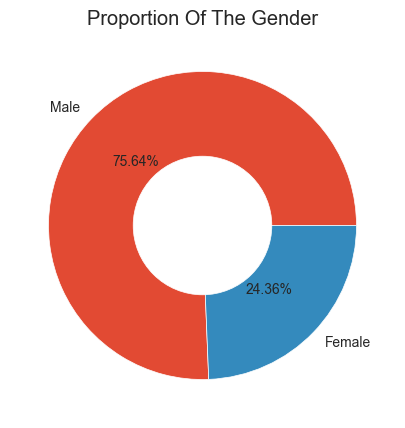

In [101]:
plt.figure( figsize = (15,5))
plt.pie( x = df['gender'].value_counts(), labels = df['gender'].value_counts().keys(), autopct = "%1.2f%%")
circle = plt.Circle((0,0), radius = 0.45 , fc = "white")
plt.gca().add_artist(circle)
plt.title('Proportion Of The Gender')
plt.show()

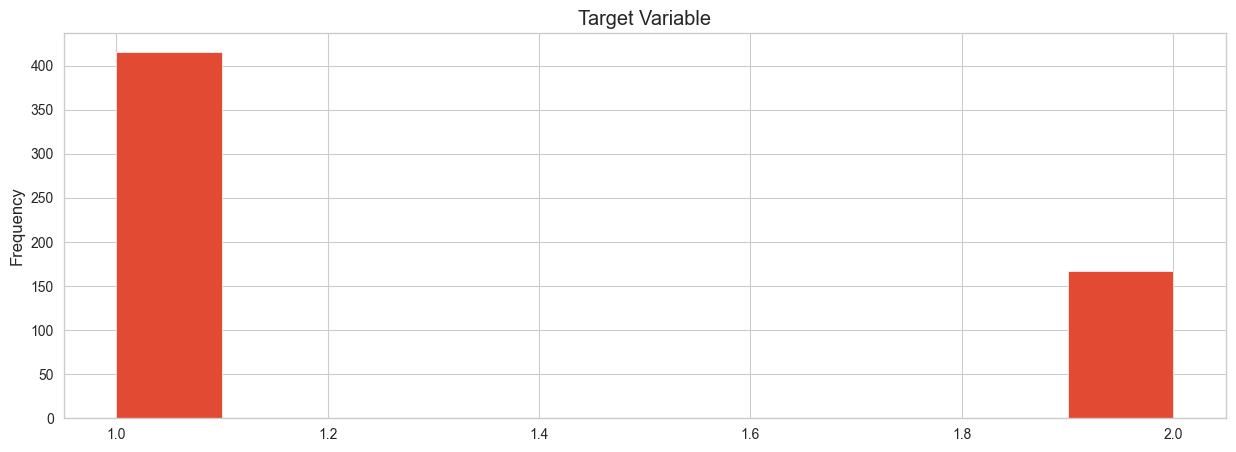

In [102]:
df['is_patient'].plot(kind = 'hist', figsize = (15,5))
plt.title('Target Variable')
plt.show()

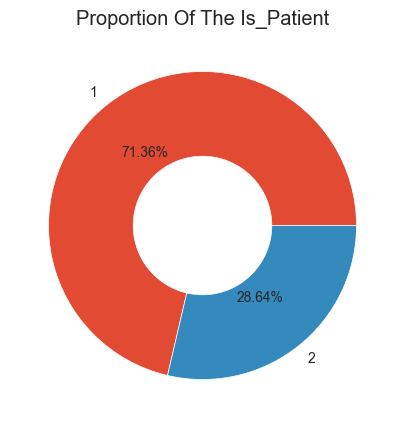

In [103]:
plt.figure( figsize = (15,5))
plt.pie( x = df['is_patient'].value_counts(), labels = df['is_patient'].value_counts().keys(), autopct = "%1.2f%%")
circle = plt.Circle((0,0), radius = 0.45 , fc = "white")
plt.gca().add_artist(circle)
plt.title('Proportion Of The Is_Patient')
plt.show()

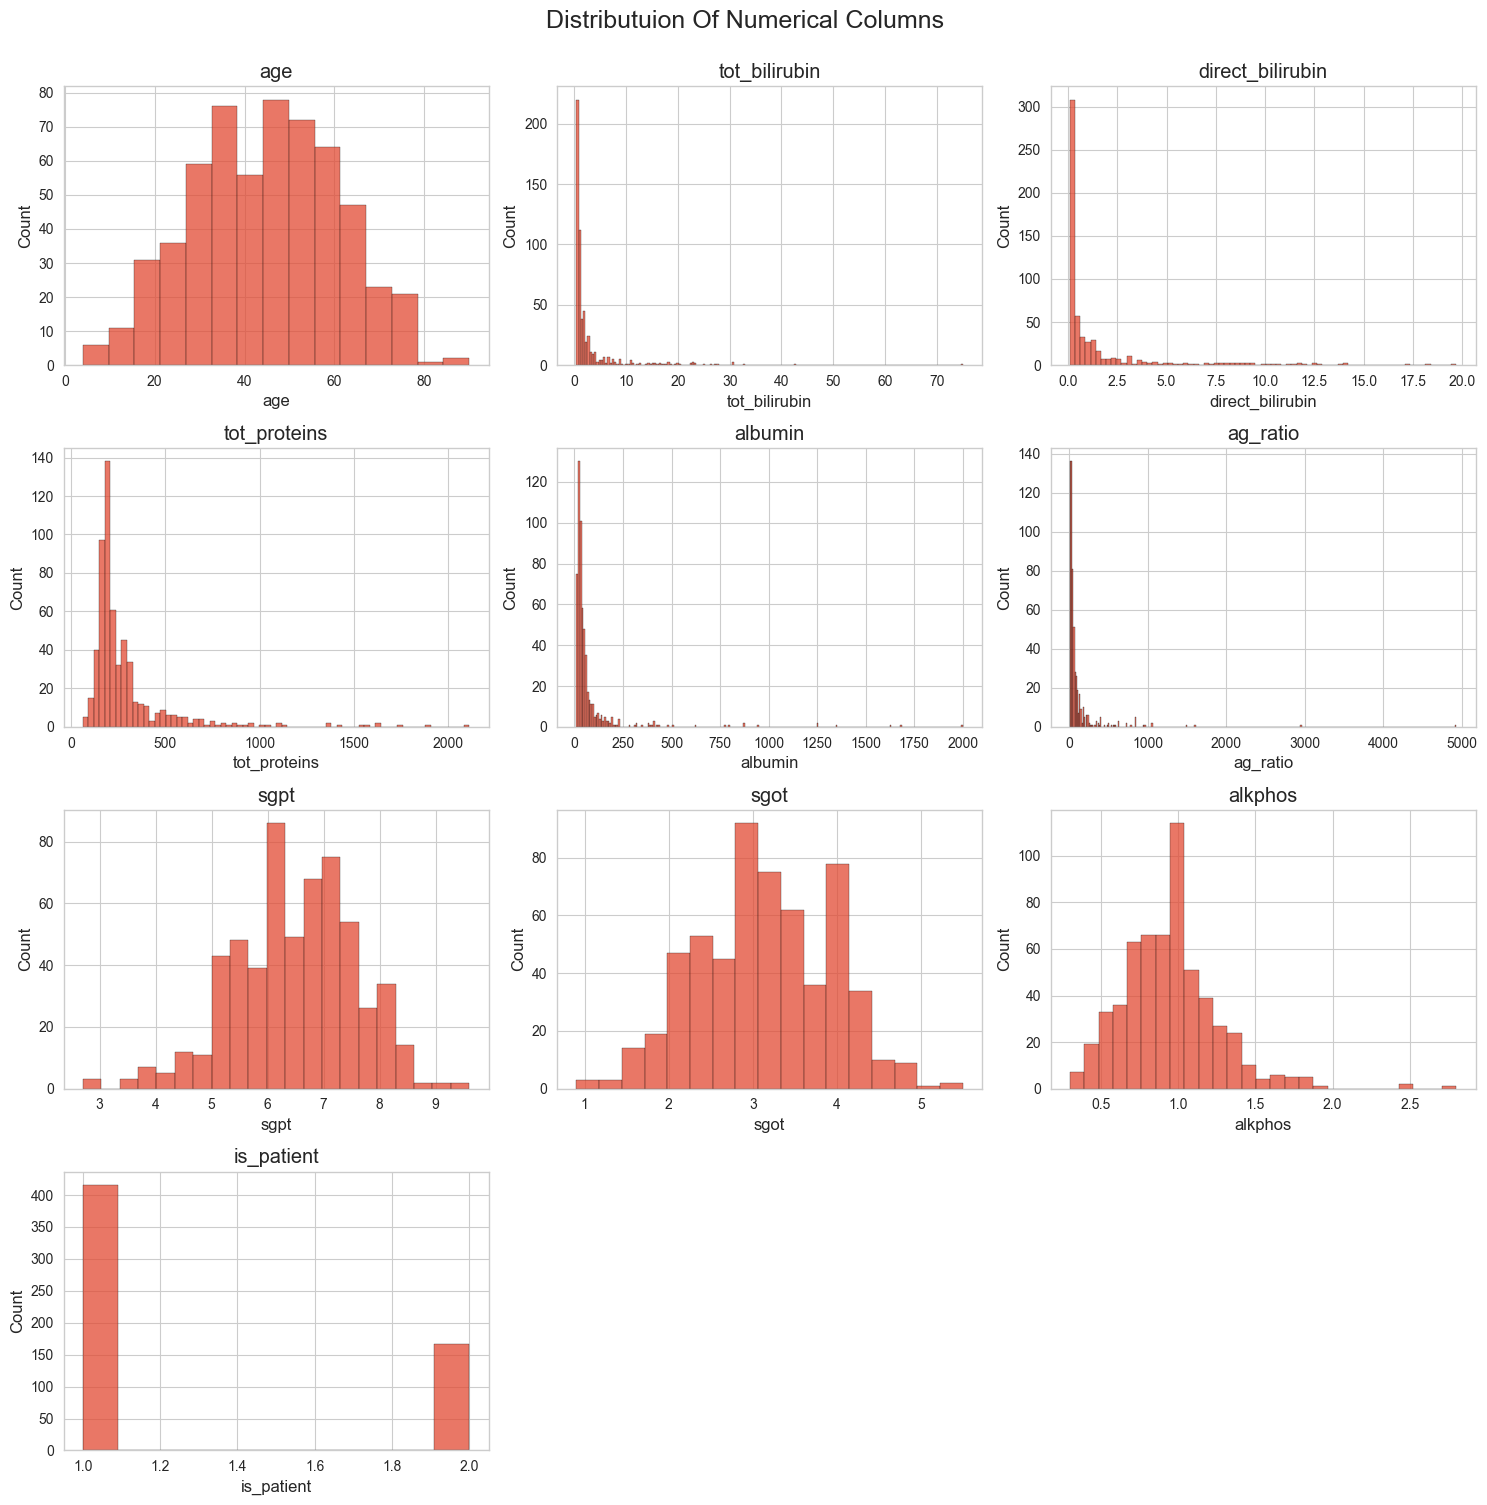

In [104]:
plt.figure( figsize = (15,15))

for index, col in enumerate(df.select_dtypes(exclude = 'object').columns, 1):
    plt.subplot(4,3,index)
    sns.histplot( df[col], linewidth = 0.2, edgecolor = "k")
    plt.title(col)

plt.suptitle('Distributuion Of Numerical Columns', size = 18, y = 1)
plt.tight_layout()
plt.show()

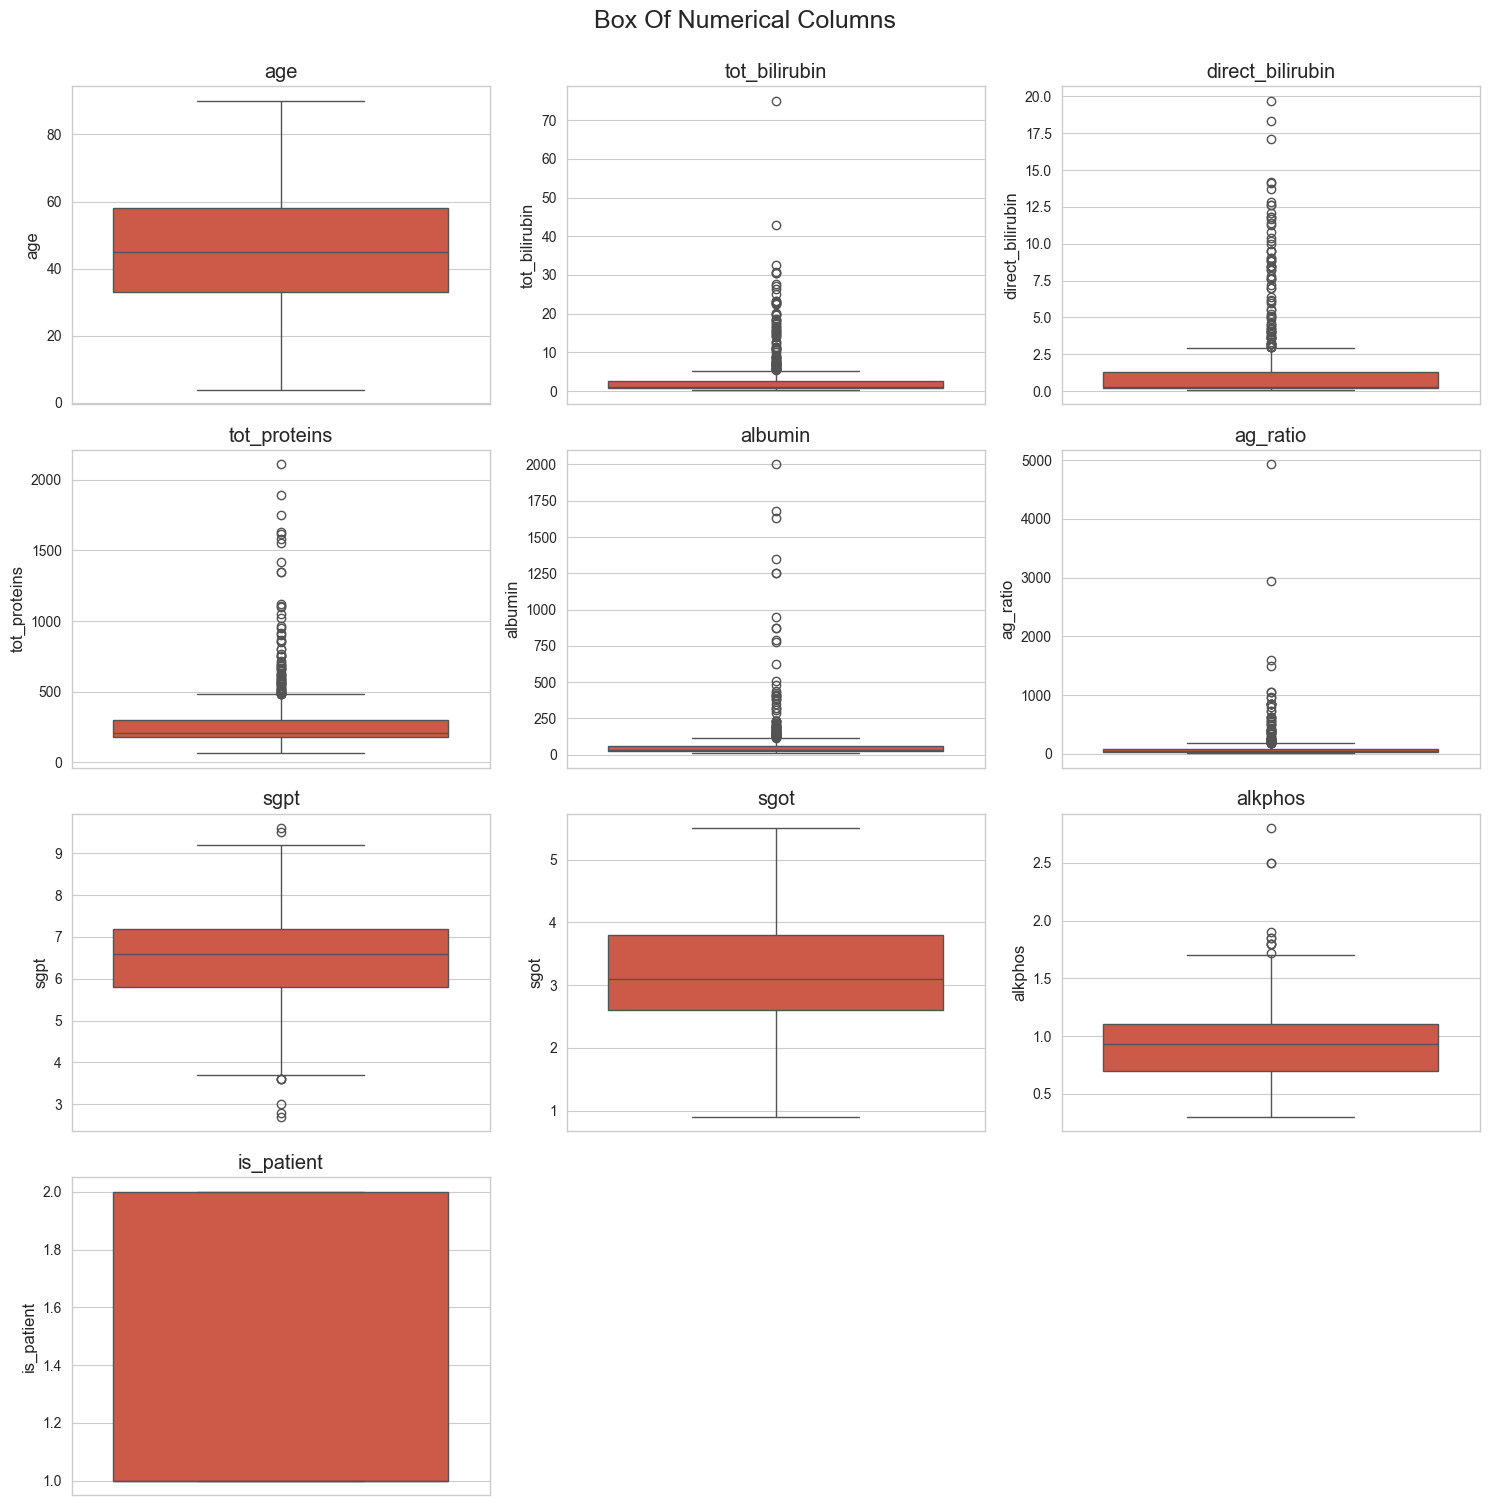

In [105]:
plt.figure( figsize = (15,15))

for index, col in enumerate(df.select_dtypes(exclude = 'object').columns, 1):
    plt.subplot(4,3,index)
    sns.boxplot( df[col])
    plt.title(col)

plt.suptitle('Box Of Numerical Columns', size = 18, y = 1)
plt.tight_layout()
plt.show()

In [106]:
def pipeline(data):
    category = data.select_dtypes(include = 'object').columns
    numerical = data.select_dtypes(exclude = 'object').columns

    for col in category:
        data[col] = data[col].fillna(data[col].mode().iloc[0])

    for col in numerical:
        data[col] = data[col].fillna(data[col].median())

    for col in numerical:
        q3 = data[col].quantile(0.75)
        q1 = data[col].quantile(0.25)
        iqr = q3 - q1
        upper = q3 + (1.5 * iqr)
        lower = q1 - (1.5 * iqr)
        data[col] = data[col].clip(upper = upper, lower = lower)

    return data

In [107]:
pipeline(df)

age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0     65  Female            0.7              0.10        187.00     16.0   
1     62    Male            5.3              2.95        481.75     64.0   
2     62    Male            5.3              2.95        481.75     60.0   
3     58    Male            1.0              0.40        182.00     14.0   
4     72    Male            3.9              2.00        195.00     27.0   
..   ...     ...            ...               ...           ...      ...   
578   60    Male            0.5              0.10        481.75     20.0   
579   40    Male            0.6              0.10         98.00     35.0   
580   52    Male            0.8              0.20        245.00     48.0   
581   31    Male            1.3              0.50        184.00     29.0   
582   38    Male            1.0              0.30        216.00     21.0   

     ag_ratio  sgpt  sgot  alkphos  is_patient  
0          18   6.8   3.3     0.90           1  
1         100   7.5   3.2     0.74           1  
2          68   7.0   3.3     0.89           1  
3          20   6.8   3.4     1.00           1  
4          59   7.3   2.4     0.40           1  
..        ...   ...   ...      ...         ...  
578        34   5.9   1.6     0.37           2  
579        31   6.0   3.2     1.10           1  
580        49   6.4   3.2     1.00           1  
581        32   6.8   3.4     1.00           1  
582        24   7.3   4.4     1.50           2  

[583 rows x 11 columns]

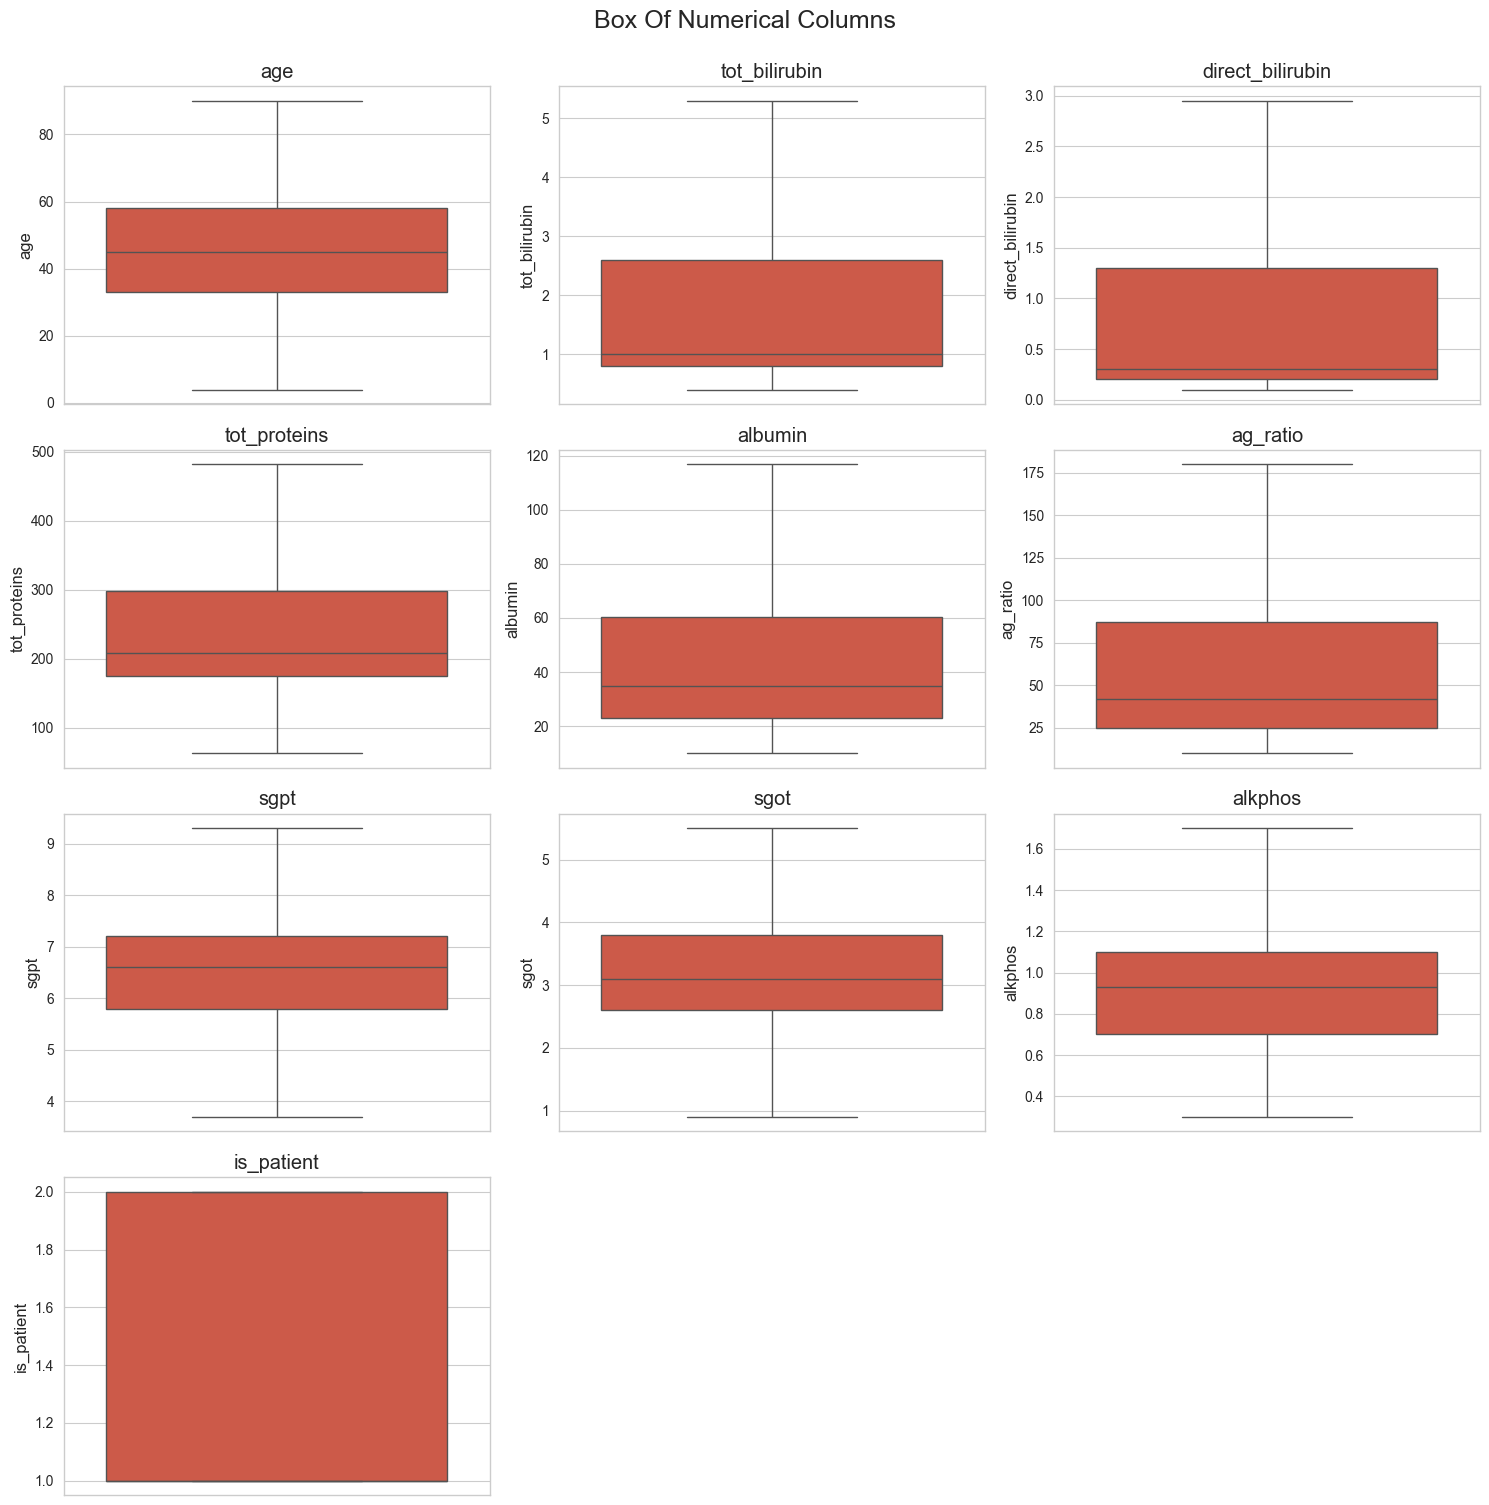

In [108]:
plt.figure( figsize = (15,15))

for index, col in enumerate(df.select_dtypes(exclude = 'object').columns, 1):
    plt.subplot(4,3,index)
    sns.boxplot( df[col])
    plt.title(col)

plt.suptitle('Box Of Numerical Columns', size = 18, y = 1)
plt.tight_layout()
plt.show()

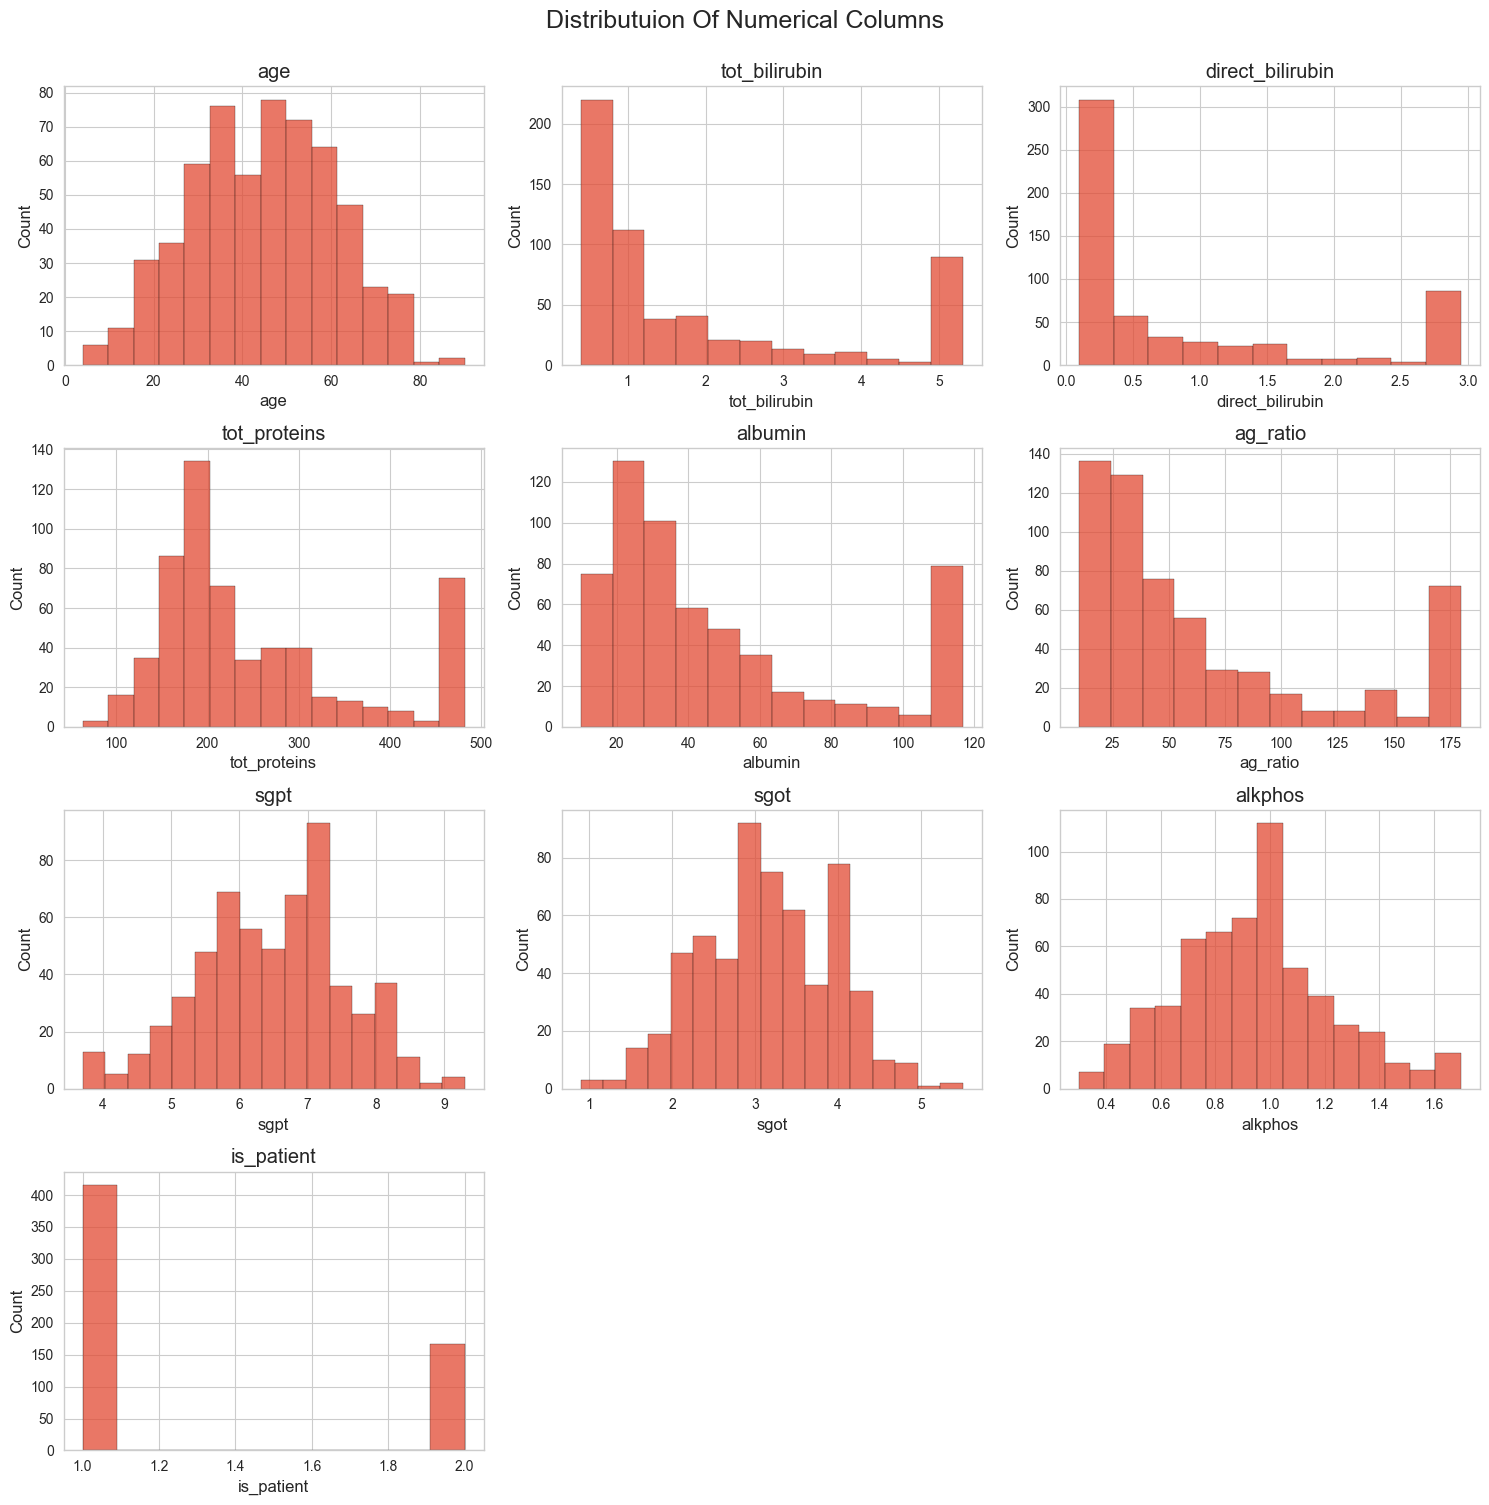

In [109]:
plt.figure( figsize = (15,15))

for index, col in enumerate(df.select_dtypes(exclude = 'object').columns, 1):
    plt.subplot(4,3,index)
    sns.histplot( df[col], linewidth = 0.2, edgecolor = "k")
    plt.title(col)

plt.suptitle('Distributuion Of Numerical Columns', size = 18, y = 1)
plt.tight_layout()
plt.show()

In [110]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [111]:
df['is_patient'] = df['is_patient'].map({1.0: 0, 2.0:1})

In [112]:
df.head(2)

age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65       0            0.7              0.10        187.00     16.0   
1   62       1            5.3              2.95        481.75     64.0   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           0  
1       100   7.5   3.2     0.74           0

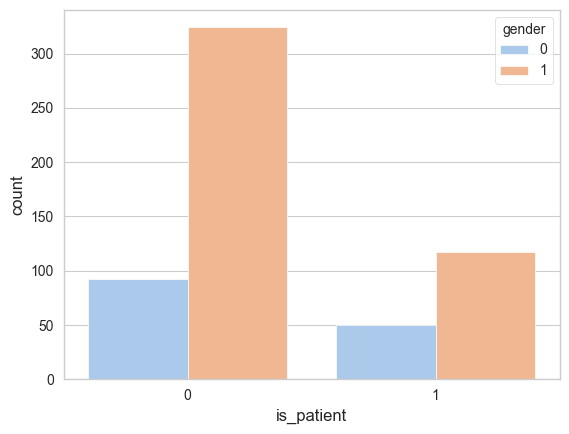

In [164]:
sns.countplot(x = df['is_patient'], hue = df['gender'], palette = 'pastel')
plt.show()

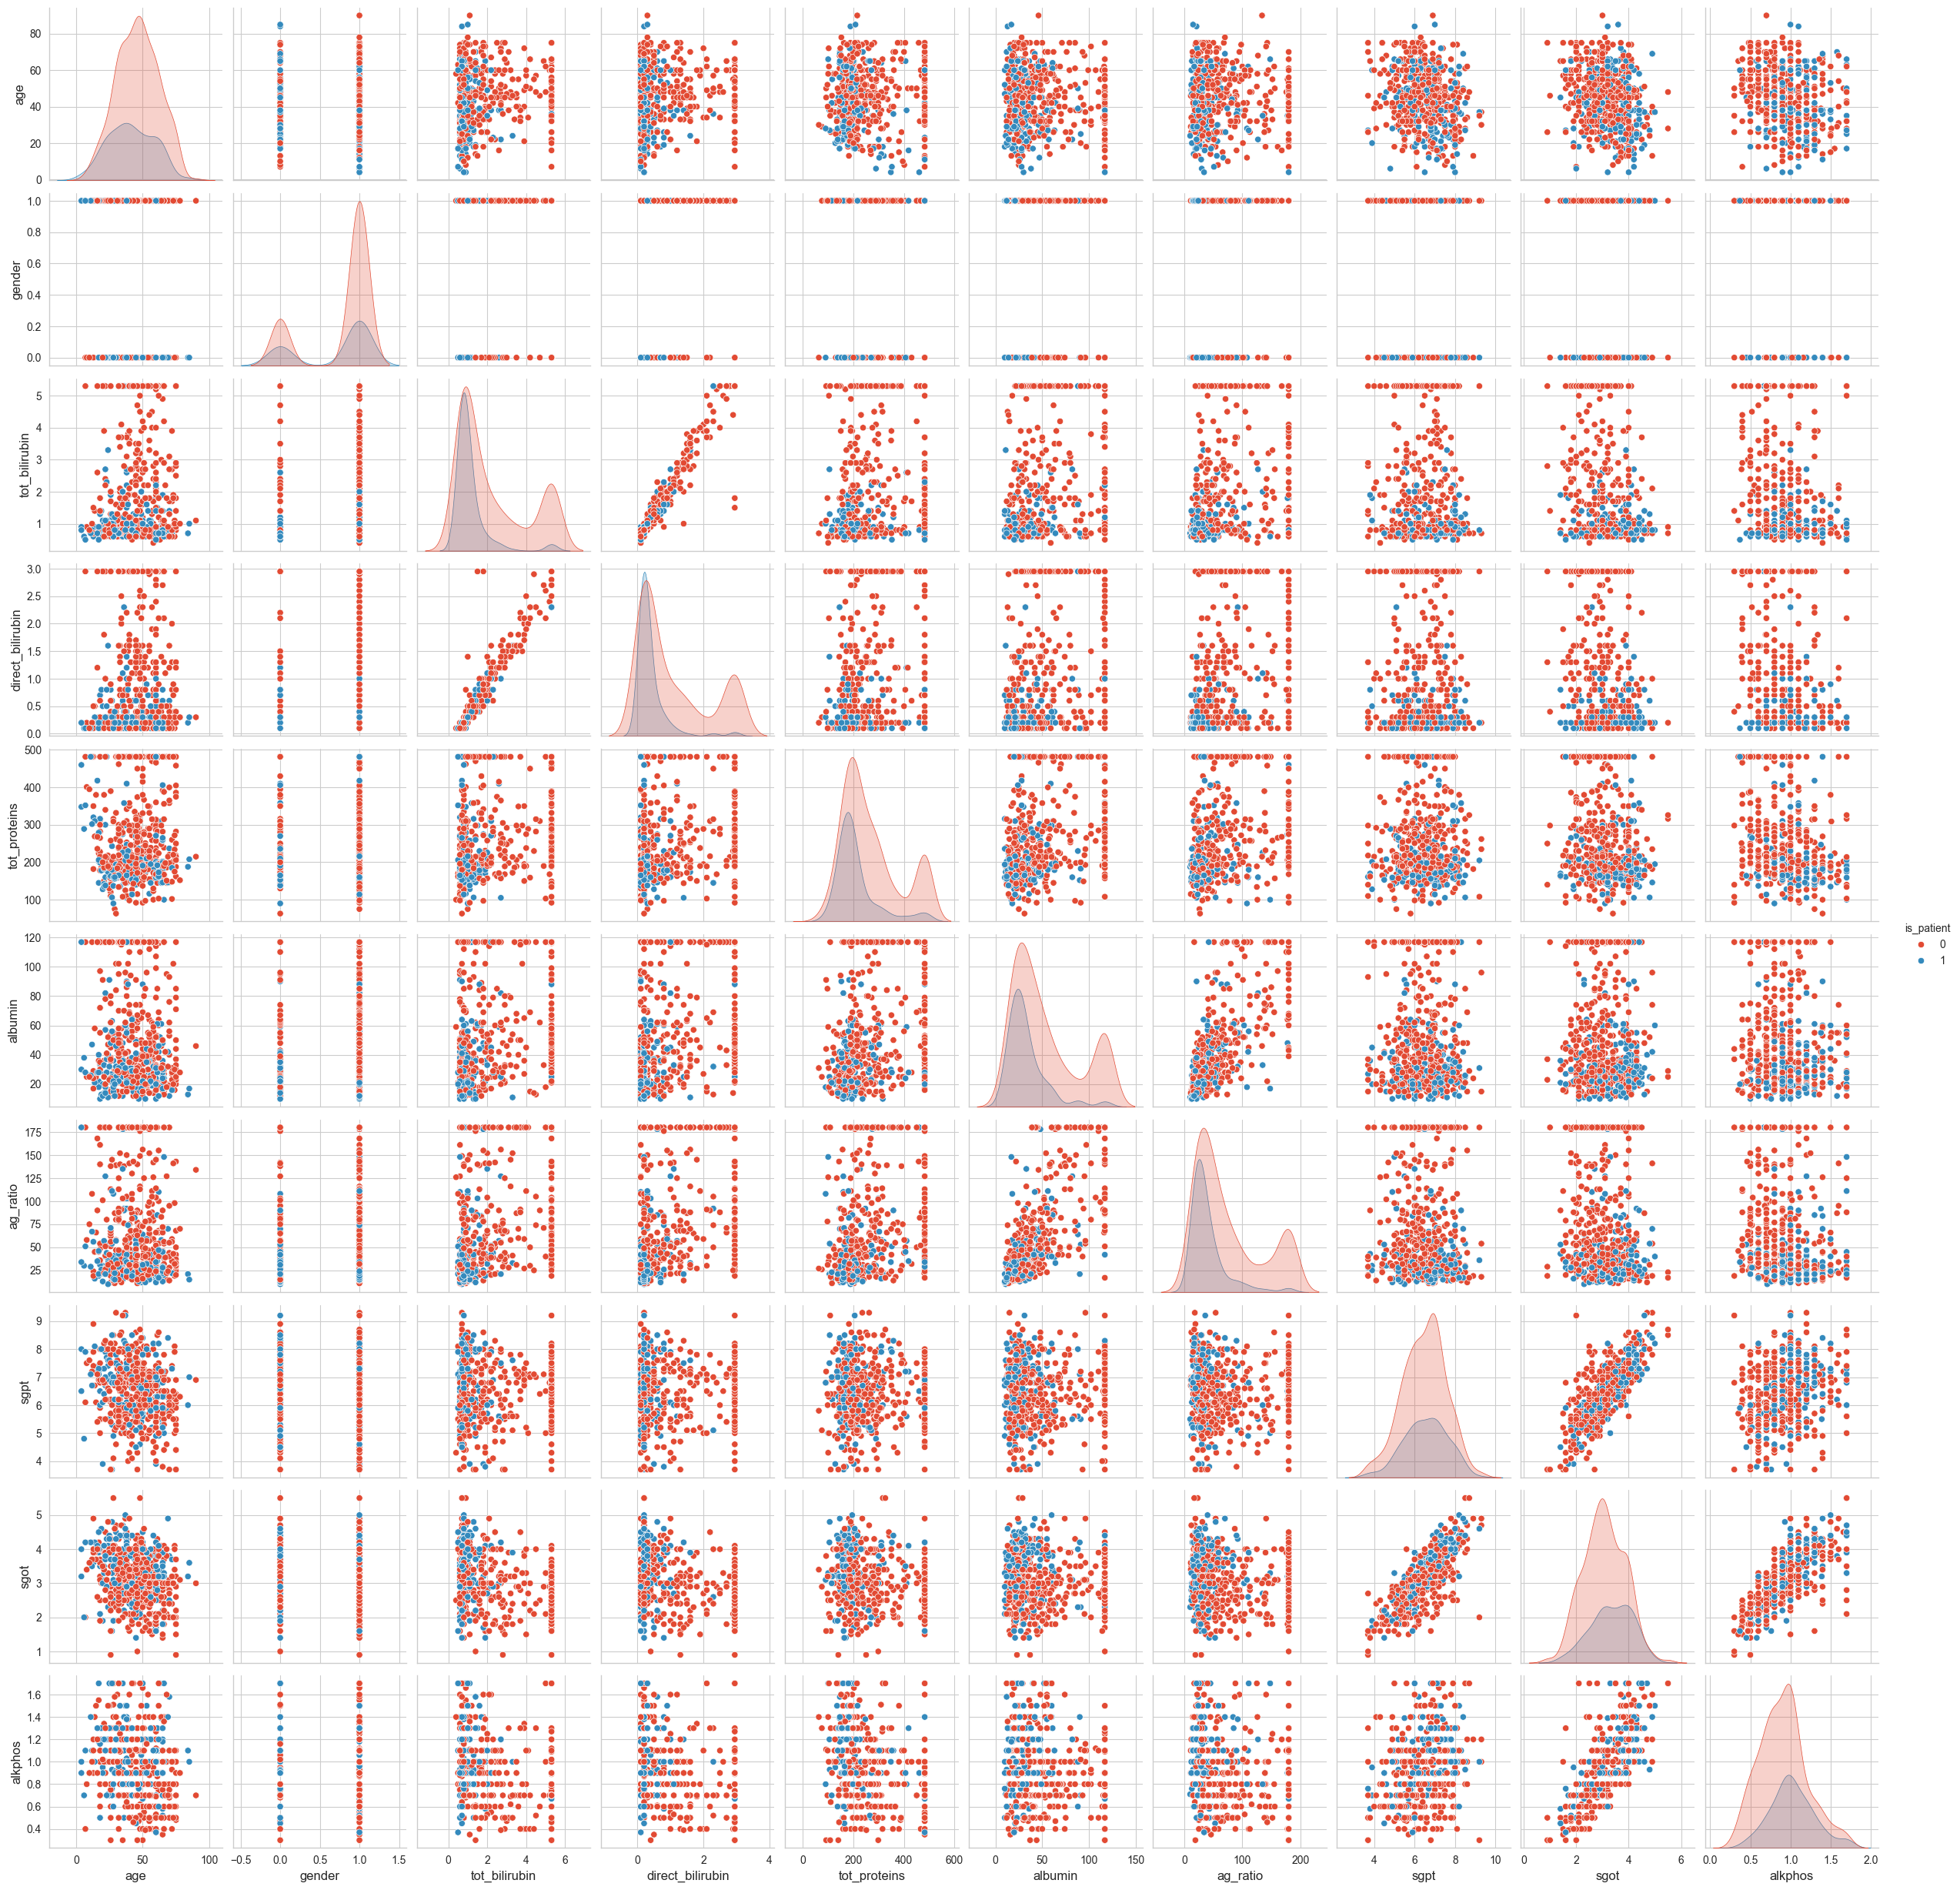

In [121]:
sns.pairplot(df, hue = 'is_patient')
plt.show()

In [122]:
x = df.drop(columns = 'is_patient', axis = 1)
y = df['is_patient']

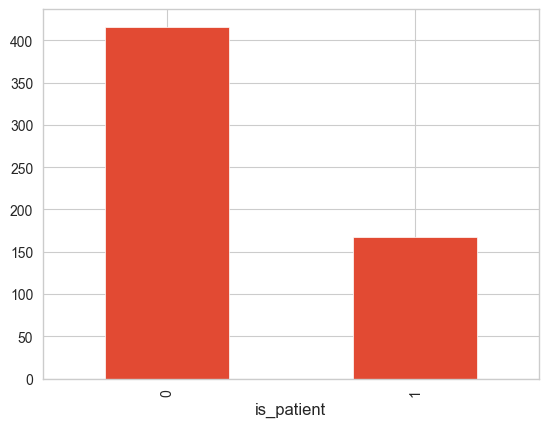

In [159]:
df['is_patient'].value_counts().plot(kind = 'bar')
plt.show()

In [123]:
from imblearn.over_sampling import SMOTE

In [124]:
x, y = SMOTE().fit_resample(x, y)

<Axes: xlabel='is_patient'>

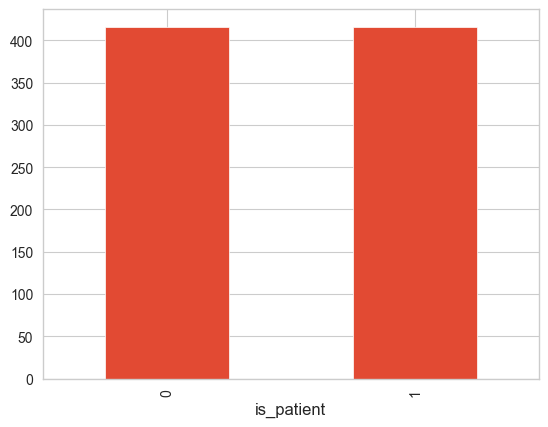

In [152]:
y.value_counts().plot( kind = 'bar')

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.25, random_state = 42)

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rfc = RandomForestClassifier()

In [129]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [132]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [133]:
train_pred = rfc.predict(x_train)

In [135]:
print( classification_report(y_train, train_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       306

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



In [136]:
test_pred = rfc.predict(x_test)

In [137]:
print( classification_report(y_test, test_pred) )

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        98
           1       0.77      0.79      0.78       110

    accuracy                           0.76       208
   macro avg       0.76      0.76      0.76       208
weighted avg       0.76      0.76      0.76       208



In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dtc = DecisionTreeClassifier()

In [140]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [143]:
dt_train_pred = dtc.predict(x_train)

In [144]:
print( classification_report(y_train, dt_train_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       306

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



In [145]:
dt_test_pred = rfc.predict(x_test)

In [146]:
print( classification_report(y_test, dt_test_pred) )

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        98
           1       0.77      0.79      0.78       110

    accuracy                           0.76       208
   macro avg       0.76      0.76      0.76       208
weighted avg       0.76      0.76      0.76       208

